> # Random Forest para el dataset de MNIST

<img src="mnist.png">

Lo primero que haremos es importar las librerías necesarias


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A continuación leemos los datos de entrenamiento y de prueba de MNIST y los ingresamos en frames para el procesamiento de los datos

In [2]:
mnist_train = pd.read_csv("MNIST_data/mnist_train.csv")
mnist_test = pd.read_csv("MNIST_data/mnist_test.csv")

Usamos el método head para ver la estructura de los datos, con sus etiquetas

In [3]:
mnist_train.head(3)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_test.head(3)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Podemos observar que la columna a categorizar es la primer columna que tiene titulo "5" en el dataset de entramiento y "7" en el de prueba, el resto de columnas son los pixeles del dígito.

Ahora procedemos a dividir el dataset de entrenamiento y de prueba en datasets con los valores de los pixeles y otros con las categorías.

In [3]:
mnist_train_pixels = mnist_train.drop("5", axis=1) # pixeles del digito MNIST del dataset de entrenamiento
mnist_train_labels = mnist_train.iloc[:,0] # variable categorica del dataset de entrenamiento
mnist_test_pixels = mnist_test.drop("7", axis=1) # pixeles del digito MNIST del dataset de prueba
mnist_test_labels = mnist_test.iloc[:,0] # variable categorica del dataset de entrenamiento

Procedemos a mirar el shape de los dataset de entrenamiento para darnos una idea de cuántas columnas y filas tiene cada uno y usamos el método head para ver como quedaron conformados los datasets

In [6]:
mnist_train_pixels.shape

(59999, 784)

In [7]:
mnist_train_pixels.head(2)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_train_labels.shape

(59999,)

In [9]:
mnist_train_labels.head(3)

0    0
1    4
2    1
Name: 5, dtype: int64

Ahora, para darnos una idea de los valores del dataset de entrenamiento procedemos a obtener la información descriptiva de este.


In [10]:
dataset_info = pd.Series(mnist_train_pixels.values.ravel())
print(" minimo: {}, \n maximo: {}, \n media: {}, \n mediana: {}, \n valor mas comun: {}"
      .format(dataset_info.min(), dataset_info.max(), 
              dataset_info.mean(), dataset_info.median(), 
              dataset_info.value_counts().idxmax()))

 minimo: 0, 
 maximo: 255, 
 media: 33.31839161605075, 
 mediana: 0.0, 
 valor mas comun: 0


Podemos observar que en el dataset encontramos valores entre 0 y 255 que son los colores de los píxeles que conforman el dígito.

Para mejorar el rendimiento de nuestros clasificadores y ayudar a que los algoritmos iterativos de aprendizaje estadístico sean más rápidos para entrenar vamos a normalizar los valores del dataset, convirtiendo los valores en 0 para los píxeles blancos y 1 para los negros.

In [4]:
mnist_train_pixels = mnist_train_pixels / 255
mnist_test_pixels = mnist_test_pixels / 255

In [12]:
dataset_info = pd.Series(mnist_train_pixels.values.ravel())
print(" minimo: {}, \n maximo: {}, \n media: {}, \n mediana: {}, \n valor mas comun: {}"
      .format(dataset_info.min(), dataset_info.max(), 
              dataset_info.mean(), dataset_info.median(), 
              dataset_info.value_counts().idxmax()))

 minimo: 0.0, 
 maximo: 1.0, 
 media: 0.130660359271895, 
 mediana: 0.0, 
 valor mas comun: 0.0


Ahora procederemos a obtener la información del primer dígito del dataset.

In [5]:
first_image_data = mnist_train_pixels.iloc[0]

Obtengamos su shape

In [6]:
first_image_data.shape

(784,)

Hay 784 valores, es decir, 784 píxeles que conforman cada dígito de MNIST.

Vamos a proceder a convertir el vector de 784 datos en una matriz de 28x28, esto se ingresara en la variable first_image y procederemos a graficar cada dato de la matriz con el fin de ver el primer número, que según el primer elemento del dataset de categorías (mnist_train_labels) debería ser un 0, este número también se guardara en la variable first_label para poder titular la gráfica con el dígito.

In [7]:
first_image = first_image_data.values.reshape(28,28)
first_label = mnist_train_labels[0]

Procedemos a mirar la matriz first_image y a verificar que si sea una matriz 28x28 con el atributo shape

In [8]:
first_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
first_image.shape

(28, 28)

comprobamos que la variable si contiene el primer valor en el arreglo de categorías y procedemos a dibujar el primer dígito.

In [10]:
first_label

0

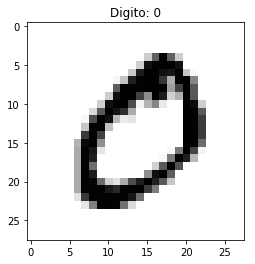

In [11]:
plt.imshow(first_image, cmap='gray_r')
plt.title('Digito: {}'.format(first_label))
plt.show()

Ahora, vamos a hacer un histograma con la variable que contiene los labels de los dígitos del dataset para ver que tan distribuidos están los datos.

(array([5923., 6742., 5958., 6131., 5842., 5420., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

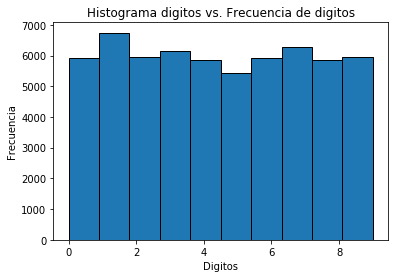

In [20]:
plt.title('Histograma digitos vs. Frecuencia de digitos')
plt.xlabel("Digitos")
plt.ylabel("Frecuencia")
plt.hist(mnist_train_labels, edgecolor = 'black')

Podemos observar que los datos están aproximadamente distribuidos de manera uniforme lo cual nos permite asegurar que el dataset tiene un buen balance de dígitos para entrenar los modelos.

# Árboles de clasificación

Primero, importamos la librería necesaria para crear un árbol de clasificación

In [5]:
from sklearn.tree import DecisionTreeClassifier

El parámetro que vamos a variar en el Árbol de Clasificación es min_samples_split, este parámetro nos indica la cantidad de muestras mínimas necesarias para dividir un nodo, esta variable tomará valores de 10% a 100% con un aumento del 10% entre valores

In [6]:
# Acá se crea un arreglo con los valores para el parámetro
samples_values = [value/100 for value in range(10,110,10)]
print(samples_values)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


Procedemos a entrenar el modelo con cada uno de los valores de la muestra mínima y a tomar los valores de la precisión en la predicción del modelo para poder comparar los resultados al final.

In [7]:
model_accuracy = [] # Variable para guardar los resultados de la precisión del modelo
for sample_split in samples_values:
    decision_tree_model = DecisionTreeClassifier(min_samples_split=sample_split)
    decision_tree_model.fit(mnist_train_pixels, mnist_train_labels)
    predictions = decision_tree_model.predict(mnist_test_pixels)
    model_accuracy.append(decision_tree_model.score(mnist_test_pixels, mnist_test_labels))

In [11]:
for accuracy, sample in zip(model_accuracy, samples_values):
    print("Precisión del modelo dividiendo el árbol en muestras del " + str(int(sample*100)) + "%: " + str(accuracy))

Precisión del modelo dividiendo el árbol en muestras del 10%: 0.620962096209621
Precisión del modelo dividiendo el árbol en muestras del 20%: 0.5107510751075107
Precisión del modelo dividiendo el árbol en muestras del 30%: 0.41104110411041106
Precisión del modelo dividiendo el árbol en muestras del 40%: 0.3414341434143414
Precisión del modelo dividiendo el árbol en muestras del 50%: 0.27502750275027504
Precisión del modelo dividiendo el árbol en muestras del 60%: 0.27502750275027504
Precisión del modelo dividiendo el árbol en muestras del 70%: 0.1993199319931993
Precisión del modelo dividiendo el árbol en muestras del 80%: 0.1993199319931993
Precisión del modelo dividiendo el árbol en muestras del 90%: 0.1993199319931993
Precisión del modelo dividiendo el árbol en muestras del 100%: 0.1993199319931993


# Bosques Aleatorios

Importamos las librerías necesarias para usar el clasificador de bosques aleatorios

In [13]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

El parámetro que podemos variar es el número de estimadores para el clasificador (n_estimators), según la documentación [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html] es la cantidad de árboles que se usará para el clasificador. 

Vamos a usar varios estimadores desde 1 hasta 200 con la finalidad de observar el comportamiento del modelo. Usualmente mientras más alto sea el número de árboles, mejor aprende el modelo, sin embargo, la velocidad de entrenamiento disminuye, por lo que haremos una búsqueda del número de estimadores ideal teniendo en cuenta el porcentaje de error para cada estimador.

In [18]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 150, 200]
error_rate = []
model_accuracy = []

for estimator in n_estimators:
    random_forest_model = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    random_forest_model.fit(mnist_train_pixels, mnist_train_labels)
    predictions = random_forest_model.predict(mnist_test_pixels)
    model_accuracy.append(random_forest_model.score(mnist_test_pixels, mnist_test_labels))
    error_rate.append(np.mean(predictions != mnist_test_labels))

A continuación observamos los valores de la precisión del modelo con las diferentes cantidades de estimadores.

In [19]:
for accuracy, estimator in zip(model_accuracy, n_estimators):
    print("Precisión del modelo con " + str(estimator) + " estimadores: " + str(accuracy))

Precisión del modelo con 1 estimadores: 0.8207820782078208
Precisión del modelo con 2 estimadores: 0.8296829682968296
Precisión del modelo con 4 estimadores: 0.9006900690069007
Precisión del modelo con 8 estimadores: 0.9400940094009401
Precisión del modelo con 16 estimadores: 0.9593959395939594
Precisión del modelo con 32 estimadores: 0.965096509650965
Precisión del modelo con 64 estimadores: 0.9682968296829683
Precisión del modelo con 100 estimadores: 0.9710971097109711
Precisión del modelo con 150 estimadores: 0.9710971097109711
Precisión del modelo con 200 estimadores: 0.9708970897089709


Se puede observar un incremento en la precisión cuando se incrementa el número de estimadores a excepción el último valor.

A continuación vamos a graficar el ratio de error con respecto a la cantidad de estimadores.

Text(0,0.5,'Error Rate')

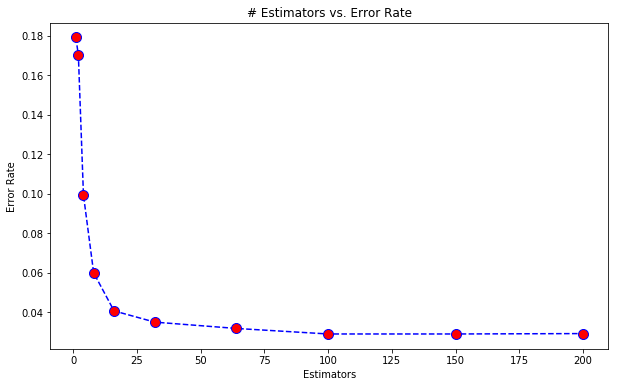

In [21]:
plt.figure(figsize=(10,6))
plt.plot(n_estimators,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('# Estimators vs. Error Rate')
plt.xlabel('Estimators')
plt.ylabel('Error Rate')

Se puede observar que después de 32 estimadores el ratio de error y la precisión del modelo (97%) es bastante similar a medida que se aumenta la cantidad de estimadores, por esta razón, la mejor cantidad de estimadores de los cuales tuvimos en cuenta para entrenar y predecir el modelo son 32 estimadores.